In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
import requests

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [3]:
csvpath = Path("CAT_10year.csv")
cat_df = pd.read_csv(csvpath)
cat_df.set_index("Date", inplace=True)
cat_df

,Close/Last,Volume,Open,High,Low
Date,,,,,
06/28/2021,$216.27,3171958,$216.45,$216.78,$213.56
06/25/2021,$216.31,11274170,$221.18,$221.75,$215.27
06/24/2021,$219.34,6827569,$216.54,$221.93,$215.33
06/23/2021,$213.79,3283361,$213.60,$216.77,$212.58
06/22/2021,$213.13,3776376,$213.49,$214.83,$211.18
...,...,...,...,...,...
07/06/2011,$110.08,6926258,$108.11,$110.12,$108.08
07/05/2011,$108.43,6876821,$107.92,$108.78,$107.34
07/01/2011,$108.62,9147434,$106.15,$109.17,$105.75


In [4]:
cat_df = cat_df.rename(columns={"Close/Last": "Close"})
cat_df

,Close,Volume,Open,High,Low
Date,,,,,
06/28/2021,$216.27,3171958,$216.45,$216.78,$213.56
06/25/2021,$216.31,11274170,$221.18,$221.75,$215.27
06/24/2021,$219.34,6827569,$216.54,$221.93,$215.33
06/23/2021,$213.79,3283361,$213.60,$216.77,$212.58
06/22/2021,$213.13,3776376,$213.49,$214.83,$211.18
...,...,...,...,...,...
07/06/2011,$110.08,6926258,$108.11,$110.12,$108.08
07/05/2011,$108.43,6876821,$107.92,$108.78,$107.34
07/01/2011,$108.62,9147434,$106.15,$109.17,$105.75


In [5]:
cat_df['Close'] = cat_df['Close'].str.replace('$', '').astype(float)
cat_df

<ipython-input-5-a5dce9edf610>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cat_df['Close'] = cat_df['Close'].str.replace('$', '').astype(float)


,Close,Volume,Open,High,Low
Date,,,,,
06/28/2021,216.27,3171958,$216.45,$216.78,$213.56
06/25/2021,216.31,11274170,$221.18,$221.75,$215.27
06/24/2021,219.34,6827569,$216.54,$221.93,$215.33
06/23/2021,213.79,3283361,$213.60,$216.77,$212.58
06/22/2021,213.13,3776376,$213.49,$214.83,$211.18
...,...,...,...,...,...
07/06/2011,110.08,6926258,$108.11,$110.12,$108.08
07/05/2011,108.43,6876821,$107.92,$108.78,$107.34
07/01/2011,108.62,9147434,$106.15,$109.17,$105.75


In [6]:
cat_df = cat_df.reset_index()

In [7]:
cat_df["Date"] = pd.to_datetime(cat_df.Date, format="%m/%d/%Y")
cat_df.index=cat_df['Date']

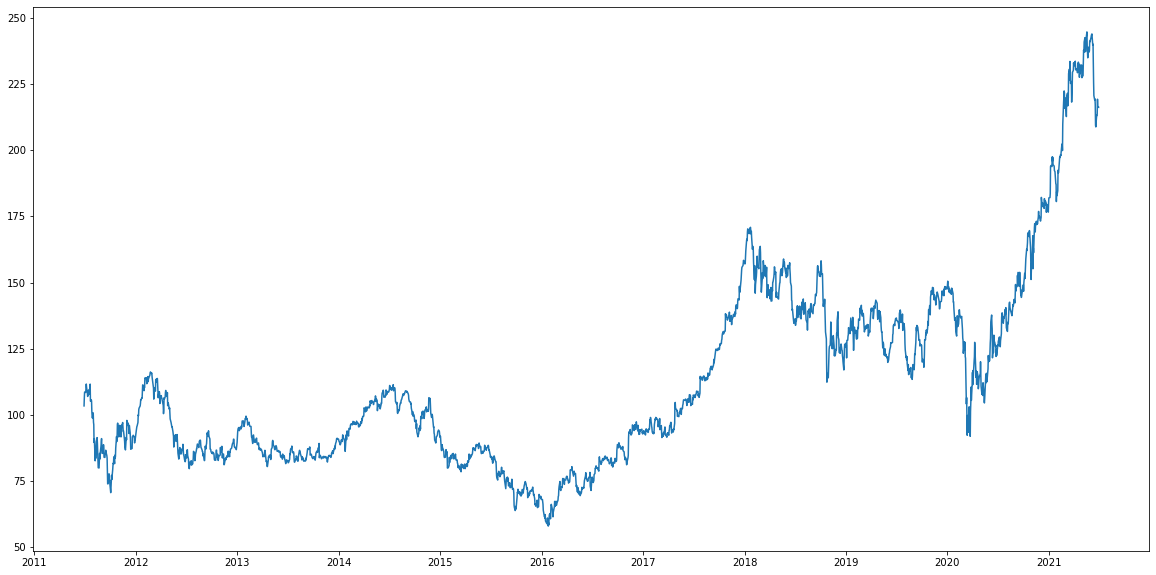

In [8]:
plt.plot(cat_df["Close"], label='Close Price History')

In [9]:
cat_df.sort_index(inplace=True)

In [10]:
cat_df

,Date,Close,Volume,Open,High,Low
Date,,,,,,
2011-06-29,2011-06-29,103.36,8639011,$104.45,$104.49,$102.40
2011-06-30,2011-06-30,106.46,10582330,$103.36,$106.93,$103.32
2011-07-01,2011-07-01,108.62,9147434,$106.15,$109.17,$105.75
2011-07-05,2011-07-05,108.43,6876821,$107.92,$108.78,$107.34
2011-07-06,2011-07-06,110.08,6926258,$108.11,$110.12,$108.08
...,...,...,...,...,...,...
2021-06-22,2021-06-22,213.13,3776376,$213.49,$214.83,$211.18
2021-06-23,2021-06-23,213.79,3283361,$213.60,$216.77,$212.58
2021-06-24,2021-06-24,219.34,6827569,$216.54,$221.93,$215.33


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [12]:
data=cat_df.sort_index(ascending=True,axis=0)
new_dataset = pd.DataFrame(index=range(0,len(cat_df)),columns=['Date','Close'])

In [13]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
new_dataset

,Date,Close
0,2011-06-29 00:00:00,103.36
1,2011-06-30 00:00:00,106.46
2,2011-07-01 00:00:00,108.62
3,2011-07-05 00:00:00,108.43
4,2011-07-06 00:00:00,110.08
...,...,...
2511,2021-06-22 00:00:00,213.13
2512,2021-06-23 00:00:00,213.79
2513,2021-06-24 00:00:00,219.34
2514,2021-06-25 00:00:00,216.31


In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
final_dataset = new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

#new_dataset.index = new_dataset.Date
#new_dataset.drop("Date",axis=1,inplace=True)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data,y_train_data = [],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
lstm_model.save("saved_model.h5")

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])